In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
import os
os.getcwd()


'/Users/tahirabbas'

In [16]:
'''os.chdir('/Users/tahirabbas/Desktop/winequalityN')'''
file_path = "/Users/your_username/Desktop/winequalityN"


In [13]:
import os

file_path = os.path.abspath('winequalityN.csv')


In [22]:
os.chdir("/Users/tahirabbas/desktop")

In [24]:
data = pd.read_csv("winequalityN.csv")

In [26]:
data.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [27]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [28]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [29]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [37]:
import pandas as pd
data = data.dropna()
data = data.dropna(subset=['fixed acidity', 'volatile acidity','citric acid','residual sugar','pH','sulphates','chlorides'])
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

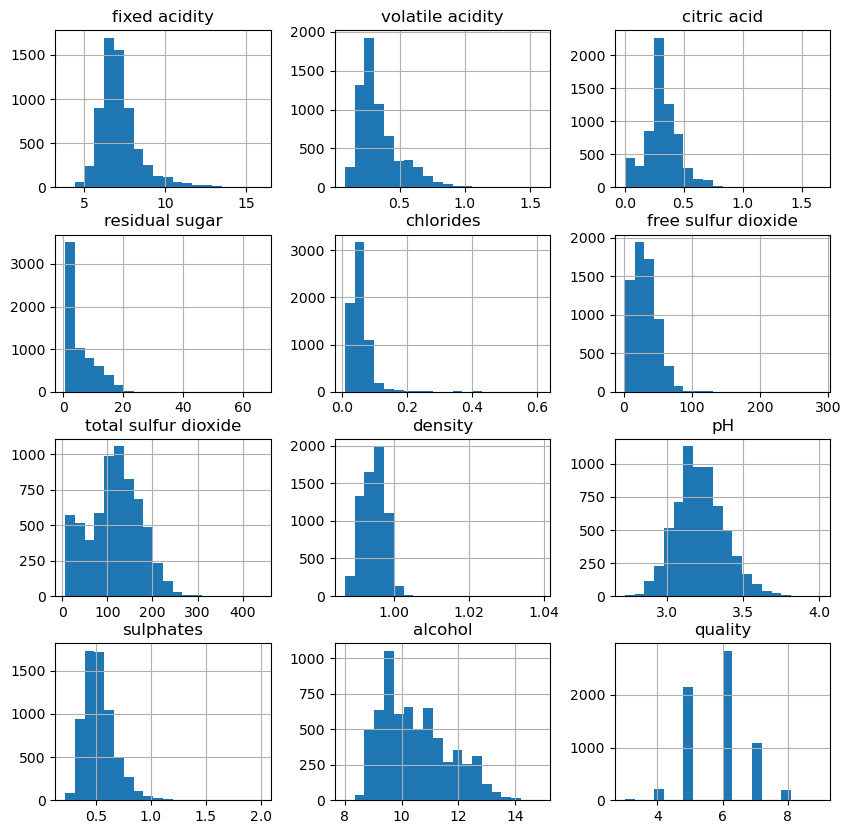

In [31]:
data.hist(bins=20, figsize=(10, 10))
plt.show()

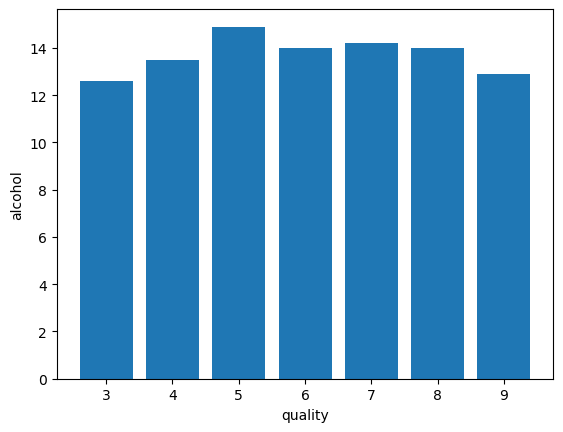

In [38]:
plt.bar(data['quality'], data['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

/var/folders/nh/_xrsx9nn1f91kstthd5v77940000gn/T/ipykernel_65827/74374883.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr() > 0.7, annot=True, cbar=False)


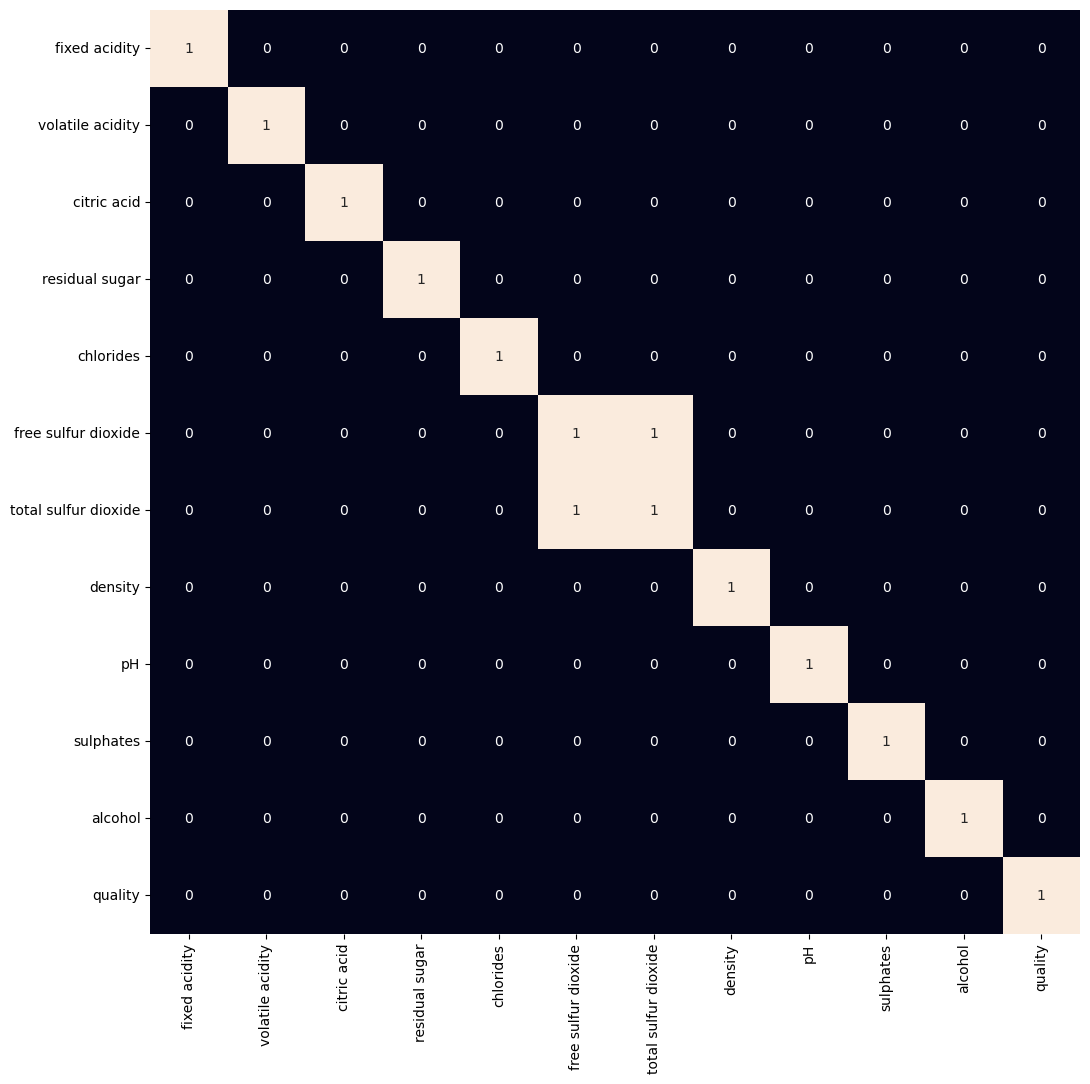

In [39]:
plt.figure(figsize=(12, 12))
sb.heatmap(data.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [40]:
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol']].values
y = data['quality'].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model = LogisticRegression(max_iter=10000)  # Increase max_iter
model.fit(X_train, y_train)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

model = LogisticRegression(max_iter=1000, solver='saga')  # Use the 'saga' solver
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, solver='saga')

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Split the data into features (X) and the target variable (y)
X = data.drop(['quality'], axis=1)
y = data['quality']

# Encode the categorical variable 'type' using one-hot encoding
X = pd.get_dummies(X, columns=['type'], drop_first=True)

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test_scaled, y_test)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.5382830626450116


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import warnings

# Split the data into features (X) and the target variable (y)
X = data.drop(['quality'], axis=1)
y = data['quality']

# Encode the categorical variable 'type' using one-hot encoding
X = pd.get_dummies(X, columns=['type'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
max_iter = 10000  # Increase max_iter
solver = 'saga'  # Use the 'saga' solver
C = 1.0  # Adjust regularization strength as needed

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    model = LogisticRegression(max_iter=max_iter, solver=solver, C=C)
    model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test_scaled, y_test)
print(f"Model Accuracy: {accuracy}")



Model Accuracy: 0.5382830626450116


In [66]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        48
           5       0.42      0.43      0.43       430
           6       0.00      0.00      0.00       540
           7       0.00      0.00      0.00       228
           8       0.05      0.45      0.09        42
           9       0.00      1.00      0.00         1

    accuracy                           0.16      1293
   macro avg       0.07      0.27      0.07      1293
weighted avg       0.14      0.16      0.14      1293



/Users/tahirabbas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tahirabbas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tahirabbas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  0   0   1   0   0   0   3]
 [  0   0  18   0   0   7  23]
 [  0   0 187   0   0 109 134]
 [  0   0 184   0   0 162 194]
 [  0   0  55   0   0  82  91]
 [  0   0   3   0   0  19  20]
 [  0   0   0   0   0   0   1]]
